# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Rizal Nur Arbaatun - 1301210044
2. Galih Akbar Nugraha - 1301213060
3. Muhammad Abiya Makruf - 1301213157

## Latar Belakang

Penggunaan model Machine Learning dalam berbagai bidang telah menjadi tren yang signifikan dalam pengembangan teknologi modern. Salah satu aplikasi yang sangat menarik adalah dalam pemodelan kebiasaan siswa menggunakan model Artificial Neural Network (ANN). Penelitian terkait ini didasarkan pada pengolahan data kebiasaan siswa, yang dapat memberikan wawasan penting bagi institusi pendidikan, guru, dan orang tua dalam mengoptimalkan lingkungan belajar siswa, meningkatkan hasil akademik, dan mendukung pertumbuhan holistik siswa.

Kebiasaan siswa adalah faktor kunci yang memengaruhi kinerja akademik mereka. Kebiasaan belajar, rutinitas, dan gaya belajar adalah beberapa aspek utama yang memengaruhi nilai siswa. Dengan mengumpulkan dan menganalisis data tentang kebiasaan siswa, kita dapat mengidentifikasi pola dan korelasi yang dapat membantu memahami faktor-faktor yang memengaruhi nilai mereka.

Pengolahan data kebiasaan siswa dimulai dengan pengumpulan data yang mencakup berbagai variabel, seperti waktu belajar, hubungan keluarga, nilai di sekolah dan banyak faktor lainnya yang relevan. Data kemudian diolah untuk menghilangkan noise atau gangguan yang tidak diinginkan dan disesuaikan agar dapat digunakan dalam analisis. Dalam tahap analisis, metode statistik dan algoritma pembelajaran mesin digunakan untuk mengidentifikasi pola dan korelasi dalam data set.

Setelah data telah dipersiapkan, langkah berikutnya adalah menerapkan model Machine Learning ANN, untuk menganalisis data tersebut. ANN adalah jenis model Machine Learning yang tepat untuk tugas ini karena kemampuannya dalam mengidentifikasi pola kompleks dalam data. Dengan menggunakan model ANN kita dapat memprediksi nilai akhir siswa berdasarkan kebiasaan mereka dan nilai sebelum-sebelumnya.

Penerapan model ANN dalam analisis kebiasaan siswa memiliki manfaat potensial yang besar dalam dunia pendidikan. Ini dapat membantu guru dan institusi pendidikan dalam merancang strategi pembelajaran yang lebih efektif, mengidentifikasi siswa yang mungkin memerlukan bantuan tambahan, dan mengukur dampak dari perubahan dalam kebijakan pendidikan. Selain itu, model ini dapat memberikan wawasan berharga kepada orang tua untuk mendukung anak-anak mereka dalam perjalanan pendidikan mereka.

Dalam rangka mencapai tujuan tersebut, penting untuk melakukan penelitian yang mendalam dalam pengembangan model ANN untuk analisis kebiasaan siswa. Dengan mengintegrasikan teknologi Machine Learning ke dalam pendidikan, kita dapat menciptakan lingkungan belajar yang lebih adaptif dan terpersonalisasi, yang pada akhirnya dapat meningkatkan hasil akademik siswa dan memberikan manfaat yang signifikan dalam sektor pendidikan.

## Eksplorasi data

### Load dataset

#### Import

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold

# Styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#### Read data

Download dataset

In [91]:
!gdown 172TQNe3kZYs3d6UWqVOXY_UrH5_KwFEf #student-por.csv
!gdown 1_szeC9LZJxyUfdVX9ThmEjgMrkcD3xzd #student-mat.csv

zsh:1: command not found: gdown
zsh:1: command not found: gdown


Read dataset

In [92]:
df = pd.read_csv('./content/student-por.csv',sep=";")
# df = pd.read_csv('./content/student-mat.csv',sep=";")

#### Analisis Data

Menampilkan jumlah kolom dan tipe data masing masing kolom

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Menampilkan lima data awal

In [94]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Deskripsi statistik dari kolom numerik pada dataset

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


Korelasi antar kolom yang numerik

<Axes: >

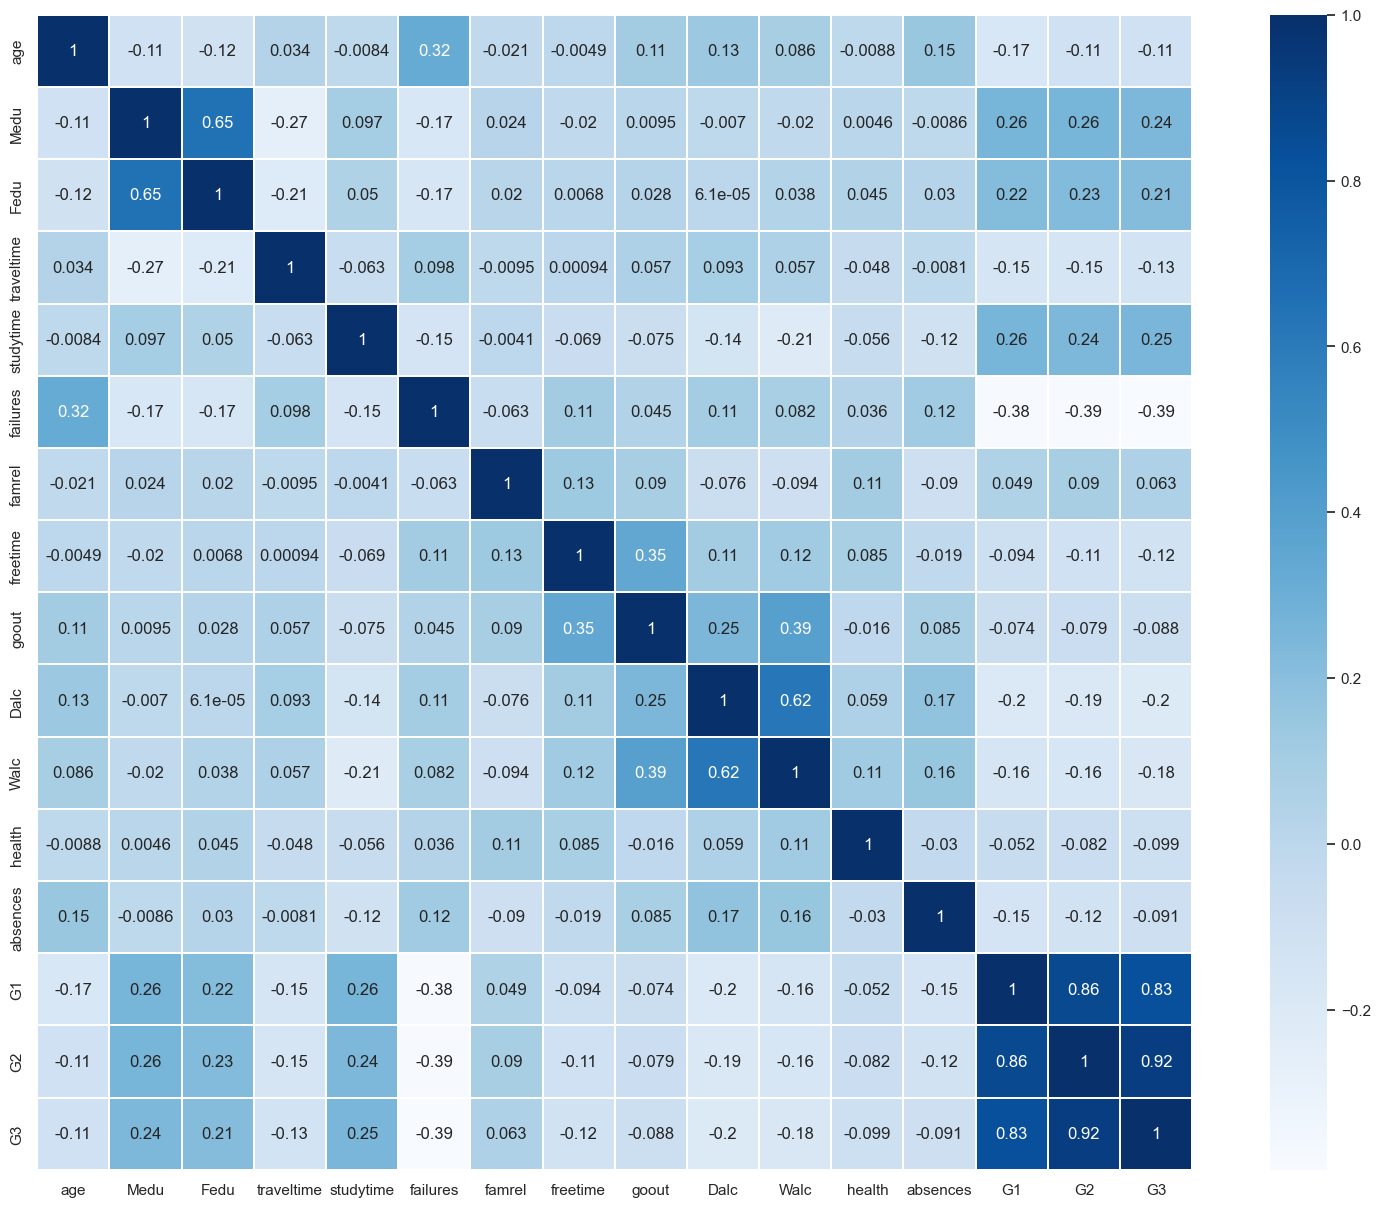

In [96]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), linewidths=0.01,
            square=True,annot=True,cmap="Blues")

Kolom G2 dan G3 memiliki korelasi tertinggi yaitu 0.92.

Kami memilih kolom G3 sebagai target. Hal ini didasarkan pada penjelasan publisher dataset. Berikut adalah korelasi kolom G3 dengan kolom yang bertipe data numerik lainnya.

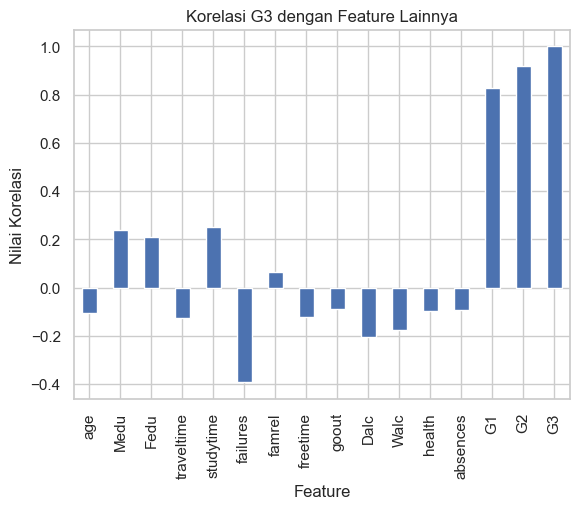

In [97]:
df.select_dtypes(include='number').corr()['G3'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Nilai Korelasi")
plt.title("Korelasi G3 dengan Feature Lainnya")
plt.show()

Kami juga ingin menganalisis kolom G3 dengan kolom lainnya yang bernilai kategorikal. Maka dilakukan binary encoding dan one hot ecoding terhadap kolom kategorikal.

In [98]:
df_numeric = df.copy()

Menampilkan semua unique value yang berada di setiap kolom

In [99]:
#Show unique value
for column in df_numeric.columns:
    unique_values = df_numeric[column].unique()
    print(f"Column: {column}")
    print(unique_values)

Column: school
['GP' 'MS']
Column: sex
['F' 'M']
Column: age
[18 17 15 16 19 22 20 21]
Column: address
['U' 'R']
Column: famsize
['GT3' 'LE3']
Column: Pstatus
['A' 'T']
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Column: Fjob
['teacher' 'other' 'services' 'health' 'at_home']
Column: reason
['course' 'other' 'home' 'reputation']
Column: guardian
['mother' 'father' 'other']
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
['yes' 'no']
Column: famsup
['no' 'yes']
Column: paid
['no' 'yes']
Column: activities
['no' 'yes']
Column: nursery
['yes' 'no']
Column: higher
['yes' 'no']
Column: internet
['no' 'yes']
Column: romantic
['no' 'yes']
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 1

Binary dan One Hot Encoding

In [100]:
# Binary encoding
df_numeric['school'] = df_numeric['school'].replace({'GP': 0, 'MS': 1})

df_numeric['sex'] = df_numeric['sex'].replace({'F': 0, 'M': 1})

df_numeric['address'] = df_numeric['address'].replace({'U': 0, 'R': 1})

df_numeric['famsize'] = df_numeric['famsize'].replace({'LE3': 0, 'GT3': 1})

df_numeric['Pstatus'] = df_numeric['Pstatus'].replace({'T': 0, 'A': 1})

df_numeric['schoolsup'] = df_numeric['schoolsup'].replace({'no': 0, 'yes': 1})

df_numeric['famsup'] = df_numeric['famsup'].replace({'no': 0, 'yes': 1})

df_numeric['paid'] = df_numeric['paid'].replace({'no': 0, 'yes': 1})

df_numeric['activities'] = df_numeric['activities'].replace({'no': 0, 'yes': 1})

df_numeric['nursery'] = df_numeric['nursery'].replace({'no': 0, 'yes': 1})

df_numeric['higher'] = df_numeric['higher'].replace({'no': 0, 'yes': 1})

df_numeric['internet'] = df_numeric['internet'].replace({'no': 0, 'yes': 1})

df_numeric['romantic'] = df_numeric['romantic'].replace({'no': 0, 'yes': 1})


In [101]:
# One hot encoding
df_numeric = pd.get_dummies(df_numeric, columns = ['Mjob', 'Fjob','reason','guardian'])
df_numeric.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,0,1,0,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,0,0,0,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,0,1,0,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,0,1,0,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False


In [102]:
df_numeric = df_numeric*1 # Convert boolean to int

Hasil binary dan one hot encoding

In [103]:
#Show unique value
for column in df_numeric.columns:
    unique_values = df_numeric[column].unique()
    print(f"Column: {column}")
    print(unique_values)

Column: school
[0 1]
Column: sex
[0 1]
Column: age
[18 17 15 16 19 22 20 21]
Column: address
[0 1]
Column: famsize
[1 0]
Column: Pstatus
[1 0]
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
[1 0]
Column: famsup
[0 1]
Column: paid
[0 1]
Column: activities
[0 1]
Column: nursery
[1 0]
Column: higher
[1 0]
Column: internet
[0 1]
Column: romantic
[0 1]
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
Column: G1
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
Column: G2
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
Column: G3
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Column: Mjob_at_home
[1 0]
Column: Mjob_health
[0 1]
Column: Mjob_other
[0 1]
Column: Mjob_services
[0 1]


Menampilkan ulang nilai korelasi G3 dengan kolom lain yang sudah di encoding

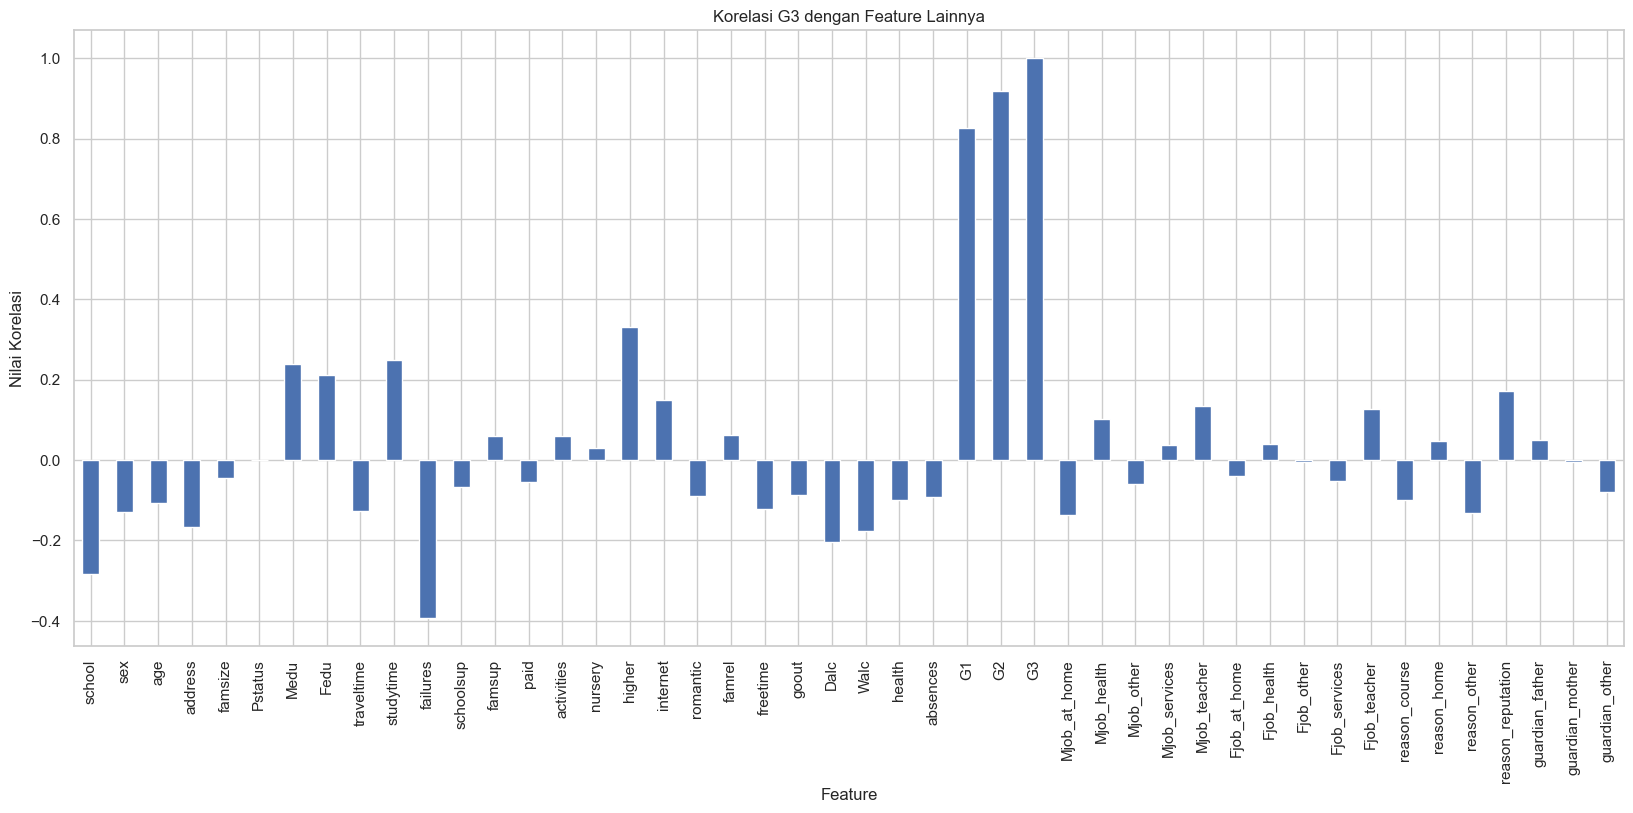

In [104]:
plt.figure(figsize=(20, 8))
df_numeric.select_dtypes(include='number').corr()['G3'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Nilai Korelasi")
plt.title("Korelasi G3 dengan Feature Lainnya")
plt.show()

**Box Plot**

Box plot untuk melihat outliers

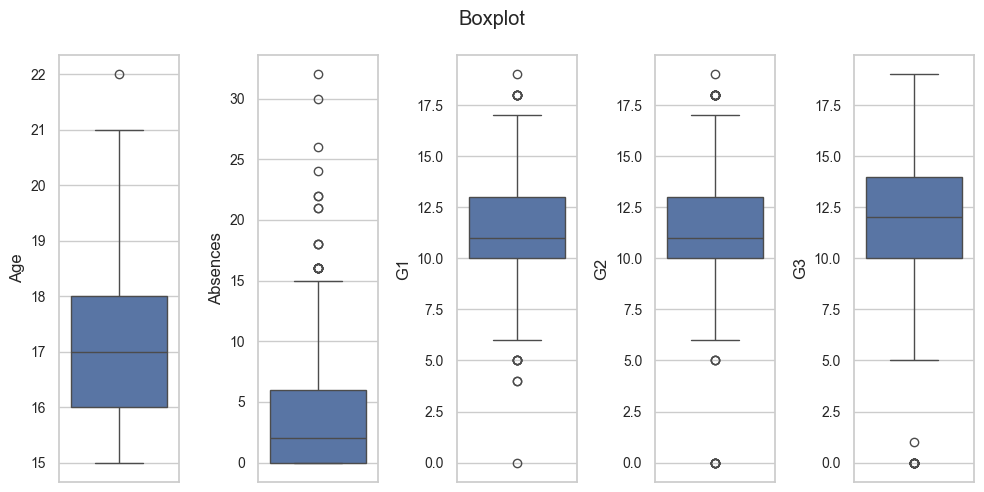

In [105]:
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = ['age', 'absences', 'G1', 'G2', 'G3']
noObject = df_numeric[objectNumeric]
for i, col in enumerate(noObject.columns) :
    sns.boxplot(y=col, data=noObject, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [106]:
for col in objectNumeric :
    q1 = noObject[col].quantile(q=0.25)
    q3 = noObject[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = noObject[noObject[col] > upperOutlier][col].count()*100/len(noObject)
    lowerPercentage = noObject[noObject[col] < lowerOutlier][col].count()*100/len(noObject)

    print((" " + col + " ").center(30, '='))
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")
    print()

============ age =============
Upper outlier :  0.154 %
Lower outlier :  0.0 %

========== absences ==========
Upper outlier :  3.236 %
Lower outlier :  0.0 %

============= G1 =============
Upper outlier :  1.233 %
Lower outlier :  1.233 %

============= G2 =============
Upper outlier :  2.311 %
Lower outlier :  1.541 %

============= G3 =============
Upper outlier :  0.0 %
Lower outlier :  2.465 %



Histogram

array([[<Axes: title={'center': 'school'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'famsize'}>,
        <Axes: title={'center': 'Pstatus'}>,
        <Axes: title={'center': 'Medu'}>],
       [<Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center': 'romantic'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'c

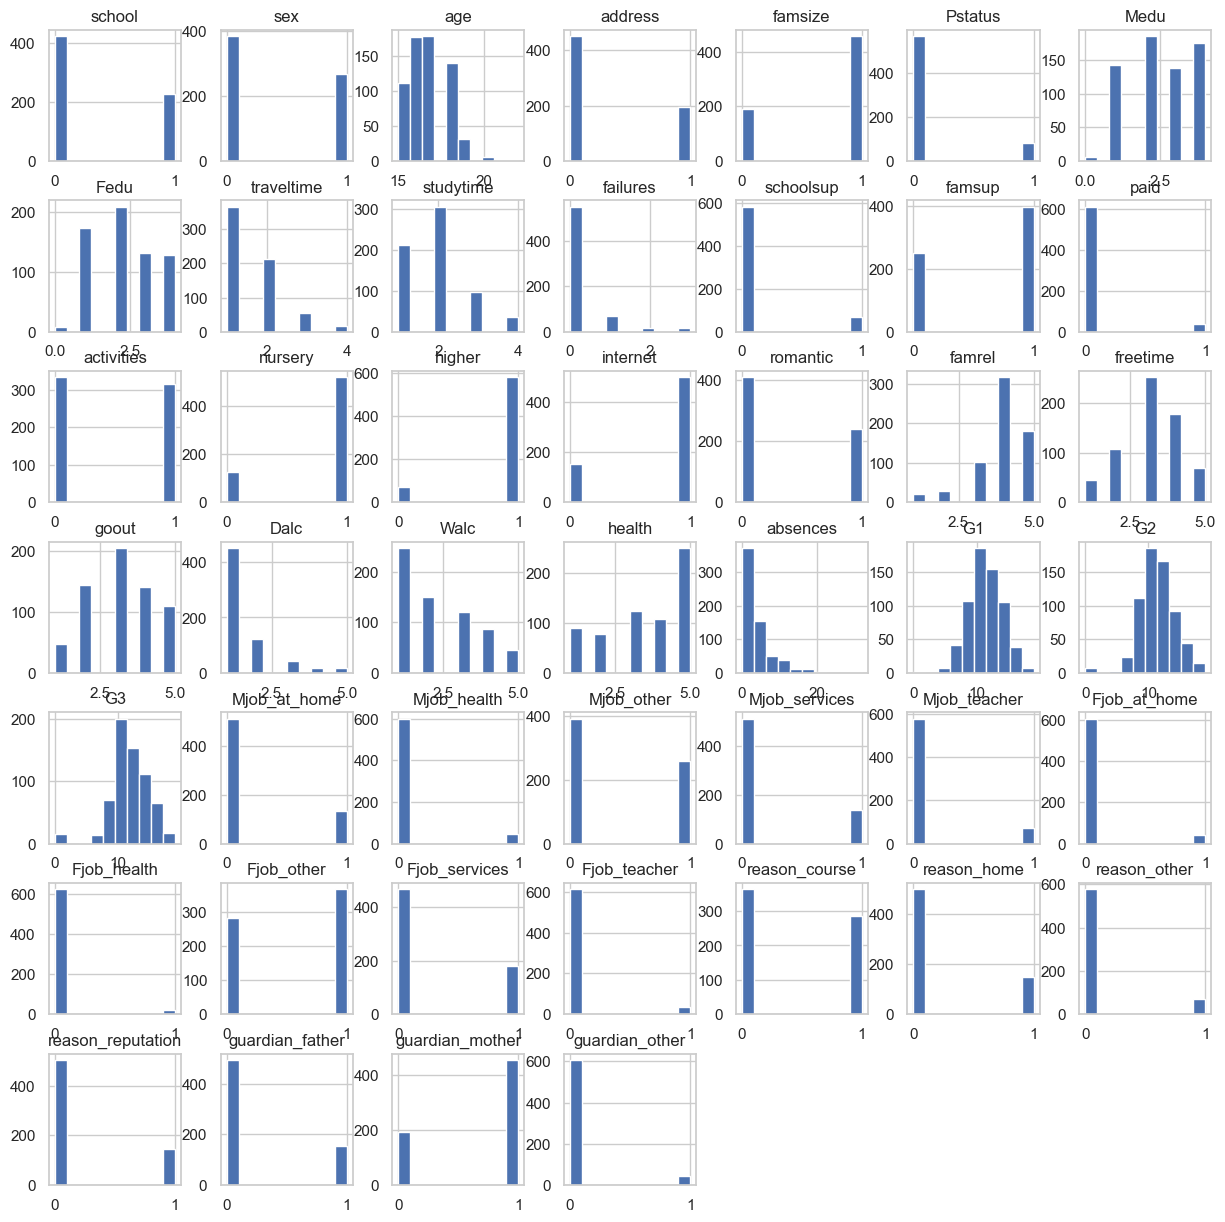

In [107]:
df_numeric.hist(figsize=(15,15))

#### Data Preprocessing

Membuat duplikat dari dataframe agar data asli tidak terubah

In [108]:
data = df.copy()

Mememeriksa apakah terdapat missin value

In [109]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Binary dan One Hot Encoding

In [110]:
# Binary encoding
data['school'] = data['school'].replace({'GP': 0, 'MS': 1})

data['sex'] = data['sex'].replace({'F': 0, 'M': 1})

data['address'] = data['address'].replace({'U': 0, 'R': 1})

data['famsize'] = data['famsize'].replace({'LE3': 0, 'GT3': 1})

data['Pstatus'] = data['Pstatus'].replace({'T': 0, 'A': 1})

data['schoolsup'] = data['schoolsup'].replace({'no': 0, 'yes': 1})

data['famsup'] = data['famsup'].replace({'no': 0, 'yes': 1})

data['paid'] = data['paid'].replace({'no': 0, 'yes': 1})

data['activities'] = data['activities'].replace({'no': 0, 'yes': 1})

data['nursery'] = data['nursery'].replace({'no': 0, 'yes': 1})

data['higher'] = data['higher'].replace({'no': 0, 'yes': 1})

data['internet'] = data['internet'].replace({'no': 0, 'yes': 1})

data['romantic'] = data['romantic'].replace({'no': 0, 'yes': 1})

In [111]:
#One hot encoding
data = pd.get_dummies(data, columns = ['Mjob', 'Fjob','reason','guardian'])

In [112]:
data = data*1 # Convert boolean to int
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


TODO PRE PROCESSING
- Tampilkan box plot numeric value (Gambar dan persentase)
- Handel outlier (Replace/Delete)
- Tampilkan box plot yang sudah dibersihkan outlier nya (Gambar dan persentase)
- Tampilkan kembali korelasi positif dengan G3
- Histogram 
- Normalisasi
- Histogram setelah normalisasi
- Setup X dan y (Bikin untuk semua data, bikin untuk korelasi positif)

## Eksplorasi Kode

TO DO EKSPLORASI CODE
- Split data
- Function Compile model
- Baseline model + Jalanin (Cari tahu aktivasi yang bagus untuk output layer) (untuk data 1 dan data 2)
- Nampilin hasil plot dari baseline model (data 1 dan data 2)
- Mencari epoch terbaik untuk baseline model (data 1 dan data 2)
- Training 3 model berbeda (data 1 dan data 2)
- Menampilkan aktivasi dan nodes terbaik (data 1 dan data 2)
- Menampilkan perbandingan 3 model (data 1 dan data 2)
- Evaluasi mana aktivasi terbaik (data 1 dan data 2)
- Menampilkan training loss over epochs (data 1 dan data 2)
- Menampilkan actual vs predict (data 1 dan data 2)

## Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [114]:
# Baseline Model
# Write your code here
basline model


In [115]:
# Model Exploration (at least 3 scheme)
# Write your code here
brute force training


In [116]:
# Evaluation
# Write your code here
pilih yg paling bagus


## Hasil dan Analisis
Performa model ANN pada regresi dapat diukur dari metrik Mean Squared Error (MSE). MSE digunakan untuk mengukur sejauh mana selisih antara nilai prediksi model dan nilai aktual, dan semakin rendah nilai MSE, semakin baik kualitas modelnya. Berikut adalah rumus untuk menghitung MSE :
    
    MSE = (1 / n) * Σ(yᵢ - ŷᵢ)²

keterangan :

n   = jumlah sampel dalam dataset

yᵢ  = nilai aktual dari data atau target variabel untuk pengamatan ke-i

ŷᵢ  = nilai yang diprediksi oleh model untuk pengamatan ke-i

Untuk mendapat nilai MSE sekecil mungkin, terdapat beberapa parameter yang perlu diperhatikan seperti, nilai epoch, activation function yang digunakan, banyaknya node yang dipakai di hidden layer.

Berdasarkan model yang kami buat, kami melakukan percobaan terhadap kolom yang dipakai untuk proses training, terdapat model yang menggunakan data dengan kolom yang memiliki korelasi positif, dan model yang menggunakan data dengan semua kolom termasuk kolom yang memiliki korelasi negatif. Sehingga terdapat 2 model yang dapat dibandingkan dikarenakan setiap activation function memiliki perhitungan yang berbeda dengan begitu setiap activation function memiliki kelebihanya masing masing tergantung data yang digunakan.

gambar 3 model

Untuk model yang hanya menggunakan kolom dengan korelasi positif memiliki nilai MSE sebesar ... . Untuk mendapatkan nilai MSE tersebut nilai epoch yang digunakan sebesar ... dengan activation function yang digunakan adalah ..., dan node yang digunakan sebanyak ... node. 

Untuk model yang menggunakan semua kolom memiliki nilai MSE sebesar ... . Untuk mendapatkan nilai MSE tersebut nilai epoch yang digunakan sebesar ... dengan activation function yang digunakan adalah ..., dan node yang digunakan sebanyak ... node.

Dari kedua model tersebut dapat disimpulkan bahwa model yang menggunakan 






Berdasarkan model yang dibuat, kami memperoleh nilai MSE sebesar ... . Nilai MSE tersebut didapat dengan cara bruteforce. Sehingga MSE minimum memiliki nilai epoch sebesar ... dengan activation function yang digunakan adalah ..., dan node yang digunakan sebanyak ... node.

Selain itu, untuk mengukur model ANN pada regresi dapat dilihat dari scatter plot hasil perbandingan nilai aktual dengan nilai yang diprediksi oleh model regresi. Jika pada scatter plot memiliki perbandingan dan aktual semakin lurus, maka semakin baik model itu.



TO DO Hasil dan analsisi
- Menjelaskan hasil terbaik yang di dapat
- Menjelaskan kenapa aktivasi yang terbaik adalah aktvisi A untuk data 1 dan aktivasi B untuk data 2
- 

## Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan!

TO DO Kesimpulan
- Memberikan kesimpulan bahwa ....